In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [3]:
URL = 'https://www.iii.org/fact-statistic/facts-statistics-motorcycle-crashes'
page = requests.get(URL)

#this is to get the html code to manipulate if we need it. Using pandas to scrape it will not be nessesary.
soup1 = BeautifulSoup(page.content, 'html.parser')
soup2 = BeautifulSoup(soup1.prettify(), 'html.parser')

#raw hmtl uncomment to view
#soup2

C:\Users\Joey_\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


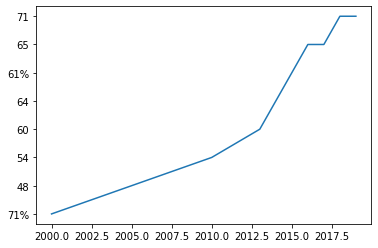

In [4]:
df_list = pd.read_html(URL)

helmet_df = df_list[1]

helmet_df1 = helmet_df[['Year','Percent']]
helmet_df1

helmet_df2 = helmet_df[['Year.1','Percent.1']]
helmet_df2.rename(columns = {'Year.1':'Year', 'Percent.1':'Percent'}, inplace = True)

helmet_df = helmet_df1.append(helmet_df2, ignore_index = True)    

plt.plot(helmet_df['Year'], helmet_df['Percent'])

In [5]:
df_list[2].dropna(inplace = True)
fatal_df = df_list[2]
fatal_df

,Year,Fatalities,Registered motorcycles,"Fatality rate per 100,000 registered motorcycles",Vehicle miles traveled (millions),Fatality rate per 100 million vehicle miles traveled
1,2010,4518.0,8009503.0,56.41,18513.0,24.40
2,2011,4630.0,8437502.0,54.87,18542.0,24.97
3,2012,4986.0,8454939.0,58.97,21385.0,23.32
4,2013,4692.0,8404687.0,55.83,20366.0,23.04
5,2014,4594.0,8417718.0,54.58,19970.0,23.00
6,2015,5029.0,8600936.0,58.47,19606.0,25.65
7,2016,5337.0,8679380.0,61.49,20445.0,26.10
8,2017,5226.0,8664108.0,60.32,20149.0,25.94
9,2018,5038.0,8659741.0,58.18,20076.0,25.09
10,2019,5014.0,8596314.0,58.33,19688.0,25.47


<AxesSubplot:title={'center':'Fatality rate per 100 million vehicle miles traveled'}>

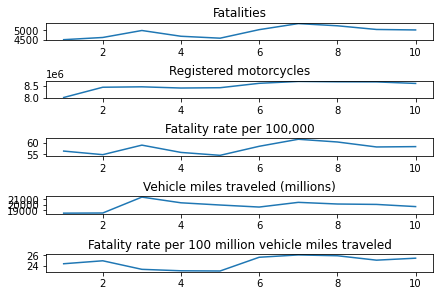

In [6]:
fatal_df.rename(columns = {'Fatality rate per 100,000 registered motorcycles': 'F_P_100'}, inplace = True)
fatal_df.rename(columns = {'Vehicle miles traveled (millions)': 'Mil_traveled'}, inplace = True)
fatal_df.rename(columns = {'Fatality rate per 100 million vehicle miles traveled': 'FP_Mil_traveled'}, inplace = True)

fig, axes = plt.subplots(5, constrained_layout=True)
fatal_df['Fatalities'].plot(ax = axes[0], title = "Fatalities")
fatal_df['Registered motorcycles'].plot(ax = axes[1], title = 'Registered motorcycles')
fatal_df['F_P_100'].plot(ax = axes[2], title = 'Fatality rate per 100,000')
fatal_df['Mil_traveled'].plot(ax = axes[3], title = 'Vehicle miles traveled (millions)' )
fatal_df['FP_Mil_traveled'].plot(ax = axes[4], title = 'Fatality rate per 100 million vehicle miles traveled')

<AxesSubplot:>

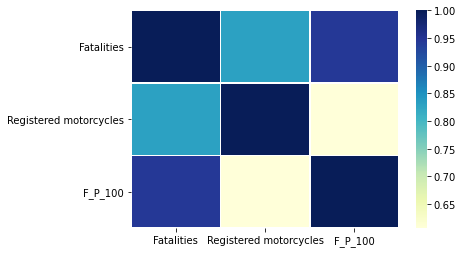

In [7]:
sb.heatmap(fatal_df[['Year','Fatalities', 'Registered motorcycles', 'F_P_100']].corr(), linewidth = 0.7, cmap = 'YlGnBu')

In [8]:
df_list[4].dropna(inplace = True)
injury_df = df_list[4]
injury_df

,Year,Injuries,Registered motorcycles,"Injury rate per 100,000 registered motorcycles",Vehicle miles traveled (millions),Injury rate per 100 million vehicle miles traveled
0,2010,82000.0,8009503.0,1028.0,18513.0,445.0
1,2011,82000.0,8437502.0,968.0,18542.0,441.0
2,2012,93000.0,8454939.0,1103.0,21385.0,436.0
3,2013,89000.0,8404687.0,1056.0,20366.0,436.0
4,2014,92000.0,8417718.0,1093.0,19970.0,461.0
5,2015,89000.0,8600936.0,1032.0,19606.0,453.0
6,2016 (1),104000.0,8679380.0,1203.0,20445.0,511.0
7,2017,89000.0,8664108.0,1023.0,20149.0,440.0
8,2018,82000.0,8659741.0,945.0,20076.0,408.0
9,2019,84000.0,8596314.0,975.0,19688.0,426.0


In [9]:
injury_df.corr()

,Injuries,Registered motorcycles,"Injury rate per 100,000 registered motorcycles",Vehicle miles traveled (millions),Injury rate per 100 million vehicle miles traveled
Injuries,1.000000,0.363208,0.946327,0.626307,0.832292
Registered motorcycles,0.363208,1.000000,0.043753,0.486818,0.088188
"Injury rate per 100,000 registered motorcycles",0.946327,0.043753,1.000000,0.512077,0.856104
Vehicle miles traveled (millions),0.626307,0.486818,0.512077,1.000000,0.090563
Injury rate per 100 million vehicle miles traveled,0.832292,0.088188,0.856104,0.090563,1.000000


In [10]:
vehicle_df = df_list[6]
vehicle_df

,Fatality rate,Motorcycles,Light trucks,Passenger cars
0,2010,NaN,NaN,NaN
1,"Per 100,000 registered vehicles",56.41,9.55,9.23
2,Per 100 million vehicle miles traveled,24.40,0.86,0.83
3,2019,NaN,NaN,NaN
4,"Per 100,000 registered vehicles",58.33,6.80,9.42
5,Per 100 million vehicle miles traveled,25.47,0.64,0.89
6,"Percent change, 2010-2019",NaN,NaN,NaN
7,"Per 100,000 registered vehicles",3.4%,-28.8%,2.1%
8,Per 100 million vehicle miles traveled,4.4%,-25.6%,7.2%
9,Fatality rate Motorcycles Light trucks Passeng...,NaN,NaN,NaN


In [11]:
time_df = df_list[8]
time_df

Unnamed: 0_level_0 Day of Week          \
                                   Unnamed: 0_level_1     Weekday           
                                   Unnamed: 0_level_2      Number Percent   
0                                Motorcyclists killed         NaN     NaN   
1                                    Midnight to 3 am       158.0    6.0%   
2                                        3 am to 6 am        95.0     3.6   
3                                        6 am to 9 am       227.0     8.7   
4                                        9 am to Noon       206.0     7.9   
5                                        Noon to 3 pm       473.0    18.1   
6                                        3 pm to 6 pm       618.0    23.7   
7                                        6 pm to 9 pm       459.0    17.6   
8                                    9 pm to Midnight       362.0    13.9   
9                                             Unknown        14.0     0.5   
10                                              Total      2612.0  100.0%   
11  Day of Week  Weekday Weekend Total  Number Per...         NaN     NaN   

                                       
   Weekend              Total          
    Number Percent     Number Percent  
0      NaN     NaN        NaN     NaN  
1    269.0   11.3%        427    8.5%  
2     93.0     3.9        188     3.7  
3     65.0     2.7        292     5.8  
4    189.0     7.9        395     7.9  
5    337.0    14.1        810    16.2  
6    405.0    16.9       1023    20.4  
7    601.0    25.1       1060    21.1  
8    422.0    17.7        784    15.6  
9      9.0     0.4         35     0.7  
10  2390.0  100.0%  5,014 (1)  100.0%  
11     NaN     NaN        NaN     NaN

In [56]:
time_df.rename(columns = {'Unnamed: 0_level_2' : 'time'}, inplace = True)
time_df.columns = ['time', 'Number_wd', 'Percent_wd', 'Number_wk','Percent_wk', 'Number_t', 'Percent_t']
time_df

,time,Number_wd,Percent_wd,Number_wk,Percent_wk,Number_t,Percent_t
0,Motorcyclists killed,NaN,NaN,NaN,NaN,NaN,NaN
1,Midnight to 3 am,158.0,6.0%,269.0,11.3%,427,8.5%
2,3 am to 6 am,95.0,3.6,93.0,3.9,188,3.7
3,6 am to 9 am,227.0,8.7,65.0,2.7,292,5.8
4,9 am to Noon,206.0,7.9,189.0,7.9,395,7.9
5,Noon to 3 pm,473.0,18.1,337.0,14.1,810,16.2
6,3 pm to 6 pm,618.0,23.7,405.0,16.9,1023,20.4
7,6 pm to 9 pm,459.0,17.6,601.0,25.1,1060,21.1
8,9 pm to Midnight,362.0,13.9,422.0,17.7,784,15.6
9,Unknown,14.0,0.5,9.0,0.4,35,0.7


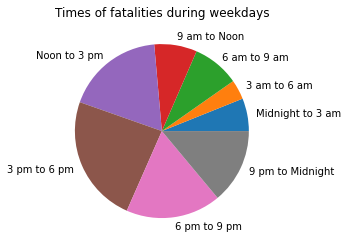

In [63]:
m1 = time_df[time_df['time'] == 'Midnight to 3 am']
m2 = time_df[time_df['time'] == '3 am to 6 am']
m3 = time_df[time_df['time'] == '6 am to 9 am']
m4 = time_df[time_df['time'] == '9 am to Noon']
m5 = time_df[time_df['time'] == 'Noon to 3 pm']
m6 = time_df[time_df['time'] == '3 pm to 6 pm']
m7 = time_df[time_df['time'] == '6 pm to 9 pm']
m8 = time_df[time_df['time'] == '9 pm to Midnight']

m1_wd = m1['Number_wd']
m2_wd = m2['Number_wd']
m3_wd = m3['Number_wd']
m4_wd = m4['Number_wd']
m5_wd = m5['Number_wd']
m6_wd = m6['Number_wd']
m7_wd = m7['Number_wd']
m8_wd = m8['Number_wd']

counts_wd = np.concatenate([m1_wd, m2_wd, m3_wd, m4_wd, m5_wd, m6_wd, m7_wd, m8_wd])
labels_1 = ['Midnight to 3 am','3 am to 6 am','6 am to 9 am','9 am to Noon','Noon to 3 pm','3 pm to 6 pm','6 pm to 9 pm','9 pm to Midnight']

#counts_wd
plt.pie(counts_wd, labels = labels_1)
plt.title('Times of fatalities during weekdays')
plt.show()

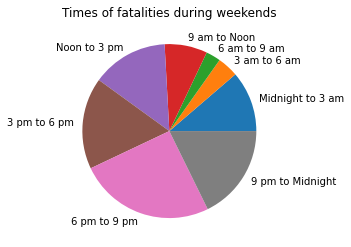

In [64]:
m1_wk = m1['Number_wk']
m2_wk = m2['Number_wk']
m3_wk = m3['Number_wk']
m4_wk = m4['Number_wk']
m5_wk = m5['Number_wk']
m6_wk = m6['Number_wk']
m7_wk = m7['Number_wk']
m8_wk = m8['Number_wk']

counts_wk = np.concatenate([m1_wk, m2_wk, m3_wk, m4_wk, m5_wk, m6_wk, m7_wk, m8_wk])
labels_2 = ['Midnight to 3 am','3 am to 6 am','6 am to 9 am','9 am to Noon','Noon to 3 pm','3 pm to 6 pm','6 pm to 9 pm','9 pm to Midnight']

#counts_wd
plt.pie(counts_wk, labels = labels_2)
plt.title('Times of fatalities during weekends')
plt.show()

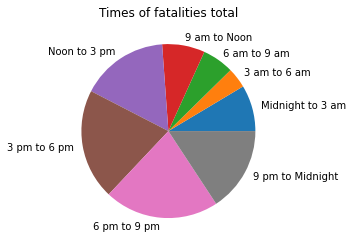

In [66]:
m1_t = m1['Number_t']
m2_t = m2['Number_t']
m3_t = m3['Number_t']
m4_t = m4['Number_t']
m5_t = m5['Number_t']
m6_t = m6['Number_t']
m7_t = m7['Number_t']
m8_t = m8['Number_t']

counts_t = np.concatenate([m1_t, m2_t, m3_t, m4_t, m5_t, m6_t, m7_t, m8_t])
labels_3 = ['Midnight to 3 am','3 am to 6 am','6 am to 9 am','9 am to Noon','Noon to 3 pm','3 pm to 6 pm','6 pm to 9 pm','9 pm to Midnight']

#counts_wd
plt.pie(counts_t, labels = labels_3)
plt.title('Times of fatalities total')
plt.show()